[Machine Learning in Python: Decision Tree Classification](https://pieriantraining.com/machine-learning-in-python-decision-tree-classification/) from [Pierian Data Inc.](https://pieriantraining.com/)

## Use cases

* Finance - Credit Scoring, Risk - predict customer default
* Healthcare - predict patient's risk of developing a disease
* Marketing - classify customers into groups based on their behavior, e.g. likely to respond to a promotion
* Fraud detection - identify fraudulent transactions
* Environmental science - predict the likelihood of a forest fire, hurricane, earthquake, etc.

## How it works

1. **Data Preparation:** Cleaned, formatted, and transformed data is used to train the model.
2. **Splitting the Data:** The data is split into training and testing sets.
3. **Building Decision Tree Model:** The model is built using iterative process called recursive partitioning or top-down inducatoin of decision trees.  At each node of the tree, we choose a feature that bes splits the data based on some criteria like `Gini Impurity` or `Information Gain`.
4. **Evaluating the Model:** The model is evaluated using the testing set.  The model is evaluated using metrics like `accuracy`, `precision`, `recall`, `F1 score`, `ROC curve`, `AUC`, etc.
5. **Tuning Parameters:** The model is tuned using parameters like `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, etc.

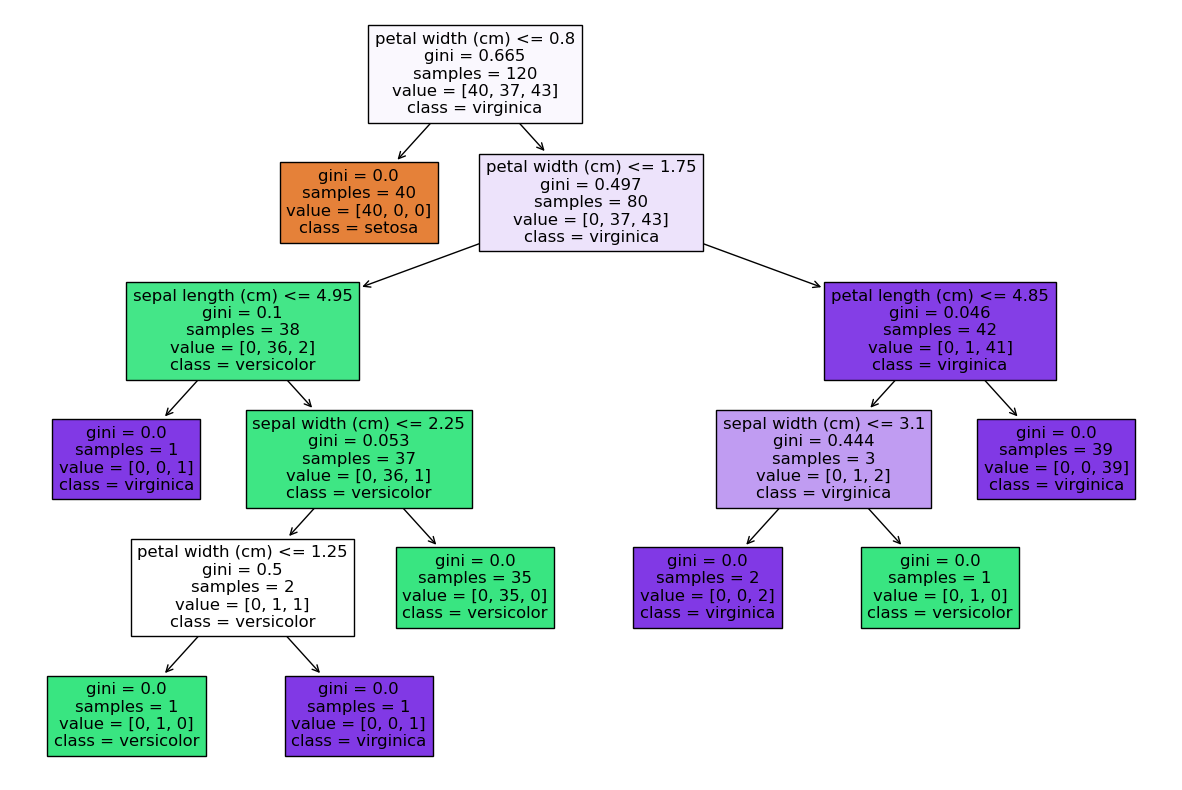

Accuracy Score: 0.8333333333333334


In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Loading iris dataset from scikit-learn library and creating a pandas dataframe
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Adding target variable 'species' to the dataframe
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Splitting the dataset into train and test sets
train = df.sample(frac=0.8, random_state=1)
test = df.drop(train.index)

# Creating decision tree classifier object and fitting it on the training set
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train[iris.feature_names], train['species'])

# Visualizing the decision tree using plot_tree function from scikit-learn library and matplotlib for styling
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

plt.show()

# Predicting species on test set and calculating accuracy score
predictions = clf.predict(test[iris.feature_names])
accuracy_score = clf.score(test[iris.feature_names], test['species'])
print('Accuracy Score:', accuracy_score)

## Pros and Cons

### Pros

* Simple and interpretable algorithm which is easy to understand, visualise and explain.  Intuitive
* Handle both categorical and numerical data - can be used in a variety of applications such as market segmentation, risk analysis, fraud detection, etc.
* Does not require any assumptions about the distribution of the data.  Robust ot outliers and missing values (in contrast to logistic regression, Naive Bayes, etc.)
* Capable of identifying complex relationships between variables by recursively splitting based on most informative features.  Allows for the capture of non-linear relationships between predictors that may be missed by non-linear models.
* Can be adapted to handled imbalanced datasets by adjusting the class weights or using ensemble methods such as random forests or boosting.  Ensures that rare events are not overlooked and improve its accuracy in real-world scenarios.

### Cons

* Overfitting - when the model is too complex and fits the training data too closely.  This can result in poor generalisation performance adn prediction accuracy
* Instability - because small variations in the data can result in completely different trees being generated.  Difficult to interpret and analyse the resultss and leads to unpredictable behaviour
* Bias - can be biased towards certain classes or attributes or features in the dataset - those which are more frequent or have more information.  
* Limited applicatbility - Not suitable for all types of problems or datasets.  Work best with categorical or binary data, rather than continuous data or mixed types of features.  Do not not handle missing data well. 
* Lack of Robustness - not very robust when faced with outliers or noise in the datae.  Anomalies can have disproportionate impact on the structure of the tree and lead to incorrect predictions.